# Subset Simulation for Correlated Normal Random Variables with a Linear Performance Function

Michael D. Shields  
Associate Professor  
Department of Civil & Systems Engineering  
Johns Hopkins University  

Date: 2/20/2020

# Problem Statement
This example runs subset simulation for a linear performance function having a specified reliability index $\beta$ and standard normal random variables with specified correlation using the affine invariate ensemble "stretch" sampler and the conventional Modified Metropolis Hastings algorithm. For more details, refer to:
- Shields, M.D. and Giovanis, D.G. and Sundar, V.S. "Subset Simulation for problems with strongly non-Gaussian, highly anisotropic, and degenerate distributions," Computers and Structures. (In Review)

## 1. Import the necessary libraries

In [1]:
from UQpy.Reliability import SubsetSimulation
import matplotlib.pyplot as plt
from UQpy.SampleMethods import MMH, Stretch
import time
import numpy as np
from UQpy.Distributions import MVNormal
from UQpy.RunModel import RunModel
import scipy.stats as stats

## 2. Define the reliability index, correlation, dimension, algorithm, and the number of trials to run.

In [2]:
# Specified Reliability Index
beta = 4

# Specified Correlation
rho = 0.5

# Dimension
dim = 2

# Specify the MCMC algorithm to use 
algo = 'MMH'

# Specify the number of trials to run 
ntrials = 1

# Define the correlation matrix
C = np.ones((dim, dim))*rho
np.fill_diagonal(C, 1)
print(C)

# Print information related to the true probability of failure
e, v = np.linalg.eig(np.asarray(C))
print(e)
print(v)
beff = np.sqrt(np.max(e))*beta
print(beff)
pf_true = stats.norm.cdf(-beta)
print(pf_true)

[[1.  0.5]
 [0.5 1. ]]
[1.5 0.5]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
4.898979485566356
3.167124183311986e-05


## 3. Execute subset simulation with the MMH algorithm

In [3]:
pf = np.zeros((ntrials,1))
cov1 = np.zeros((ntrials,1))
cov2 = np.zeros((ntrials,1))
for i in range(ntrials):
    model = RunModel(model_script='pfn.py', model_object_name="RunPythonModel", ntasks=1, b_eff=beff, d=dim)
    dist = MVNormal(mean=np.zeros((dim)), cov=C)
    x = dist.rvs(nsamples=1000, random_state=349857)

    x_ss = SubsetSimulation(mcmc_class=MMH, runmodel_object=model, samples_init=x, p_cond=0.1,
                            nsamples_per_ss=1000, verbose=True, dimension=dim, log_pdf_target=dist.log_pdf, nchains=100,
                            random_state=342985)
    pf[i] = x_ss.pf
    cov1[i] = x_ss.cov1
    cov2[i] = x_ss.cov2

UQpy: Running Subset Simulation with MCMC of type: <class 'UQpy.SampleMethods.MMH'>
UQpy: Subset Simulation, conditional level 0 complete.
UQpy: Subset Simulation, conditional level 1 complete.
UQpy: Subset Simulation, conditional level 2 complete.
UQpy: Subset Simulation, conditional level 3 complete.
UQpy: Subset Simulation, conditional level 4 complete.
UQpy: Subset Simulation Complete!


## 4. Plot samples from each conditional level and print the subset simulation results

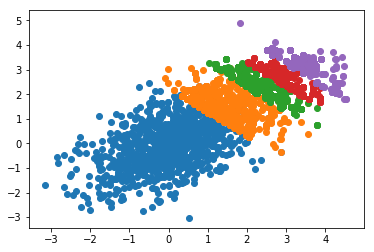

Mean Pf: 2.1500000000000004e-05
Mean beta:  4.090739447944051
CoV:  [0.]
CoV beta:  [0.]
CoV log10:  [0.]
0.4686149805543992
0.7810907757744935


In [4]:
for i in range(len(x_ss.g)):
    plt.scatter(x_ss.samples[i][:, 0], x_ss.samples[i][:, 1], marker='o')
plt.show()

print('Mean Pf:', np.mean(pf))
pf[pf==0] = 1e-100
print('Mean beta: ', -np.mean(stats.norm.ppf(pf)))
print('CoV: ', stats.variation(pf))
print('CoV beta: ', np.absolute(stats.variation(stats.norm.ppf(pf))))
print('CoV log10: ', np.absolute(stats.variation(np.log10(pf))))
print(np.mean(cov1))
print(np.mean(cov2))

## 5. Plot histograms of the failure probabilities and the reliability indices from subset simulation

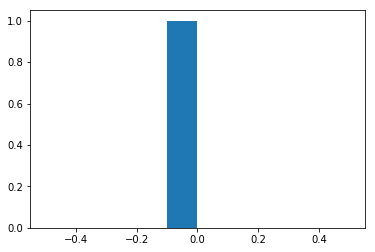

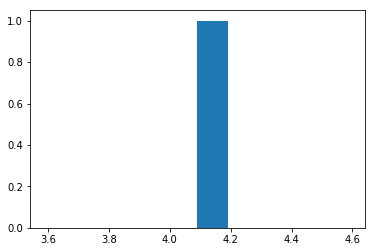

In [5]:
plt.hist(pf)
plt.show()

beta = -stats.norm.ppf(pf)
plt.hist(beta)
plt.show()

## 6. Execute subset simulation with the Stretch algorithm

In [6]:
pf = np.zeros((ntrials,1))
cov1 = np.zeros((ntrials,1))
cov2 = np.zeros((ntrials,1))
for i in range(ntrials):
    model = RunModel(model_script='pfn.py', model_object_name="RunPythonModel", ntasks=1, b_eff=beff, d=dim)
    dist = MVNormal(mean=np.zeros((dim)), cov=C)
    x = dist.rvs(nsamples=1000, random_state=349857)

    x_ss = SubsetSimulation(mcmc_class=Stretch, runmodel_object=model, samples_init=x, p_cond=0.1,
                            nsamples_per_ss=1000, verbose=True, dimension=dim, log_pdf_target=dist.log_pdf, nchains=100,
                            random_state=342985)
    pf[i] = x_ss.pf
    cov1[i] = x_ss.cov1
    cov2[i] = x_ss.cov2

UQpy: Running Subset Simulation with MCMC of type: <class 'UQpy.SampleMethods.Stretch'>
UQpy: Subset Simulation, conditional level 0 complete.
UQpy: Subset Simulation, conditional level 1 complete.
UQpy: Subset Simulation, conditional level 2 complete.
UQpy: Subset Simulation, conditional level 3 complete.
UQpy: Subset Simulation, conditional level 4 complete.
UQpy: Subset Simulation Complete!


## 7. Plot samples from each conditional level and print the subset simulation results

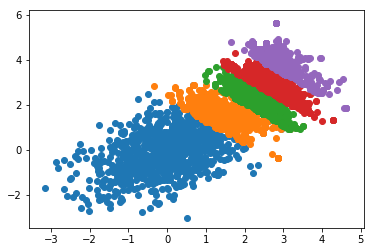

Mean Pf: 2.0000000000000005e-05
Mean beta:  4.10747965458625
CoV:  [0.]
CoV beta:  [0.]
CoV log10:  [0.]
0.4874423042781576
0.665736434334189


In [7]:
for i in range(len(x_ss.g)):
    plt.scatter(x_ss.samples[i][:, 0], x_ss.samples[i][:, 1], marker='o')
plt.show()

print('Mean Pf:', np.mean(pf))
pf[pf==0] = 1e-100
print('Mean beta: ', -np.mean(stats.norm.ppf(pf)))
print('CoV: ', stats.variation(pf))
print('CoV beta: ', np.absolute(stats.variation(stats.norm.ppf(pf))))
print('CoV log10: ', np.absolute(stats.variation(np.log10(pf))))
print(np.mean(cov1))
print(np.mean(cov2))

## 8. Plot histograms of the failure probabilities and the reliability indices from subset simulation

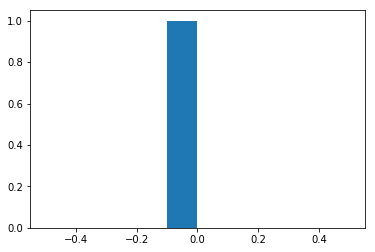

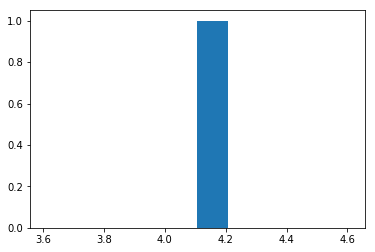

In [8]:
plt.hist(pf)
plt.show()

beta = -stats.norm.ppf(pf)
plt.hist(beta)
plt.show()